Individual Large Runs

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats

In [2]:
def reset_S(N, m):
    if m> 1: raise ValueError("Slope too big")
    if m<-1: raise ValueError("Slope too small")
    S = np.zeros(N)
    for i in range(1, N):
#         print(i)
#         print(S[i-1])
#         print(m*i/N)
#         print("\n")
        if S[i-1] > (m*i): S[i] = S[i-1] - 1
        else: S[i] = S[i-1] + 1
    return S

In [3]:
def brick_update_S(S):
    N = len(S)
    diff = S[-1] - S[0]
    nextS = np.copy(S)
    nextS[0] = np.minimum(S[-2]+1-diff, S[1]+1)
    for idx, val in enumerate(S):
        if (idx != 0) and (idx != N-1):
            nextS[idx] = np.minimum(S[idx-1]+1, S[idx+1]+1)
            if nextS[idx] < S[idx]: raise ValueError("Decreasing entropy")
    nextS[-1] = nextS[0] + diff
    return(nextS)

In [4]:
def random_update_S(S):
    N = len(S)
    diff = S[-1] - S[0]
    i = random.randint(0,N-2)
#     print(i)
    if i == 0: S[0] = np.minimum(S[ -2]+1-diff, S[1]+1)
    else:      S[i] = np.minimum(S[i-1]+1,      S[i+1]+1)
    S[-1] = S[0] + diff
    return(S)

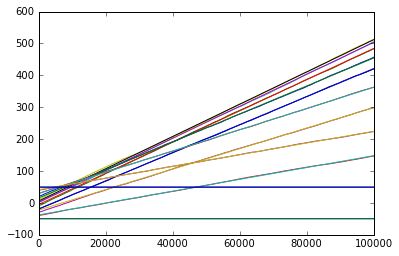

[ 0.          0.00185604  0.00321426  0.00439847  0.00489036  0.00501201
  0.00505651  0.00438461  0.00333011  0.001831    0.        ]


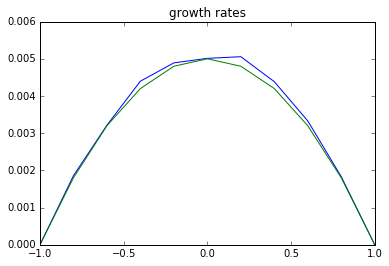

In [ ]:
N = 100
Steps = 100000
slopes = np.array([])
ts = np.arange(Steps+1)

for m in range(-10,12,2):
    S = reset_S(N, m/10)
    heights = np.array([np.mean(S)])
    for i in range(Steps):
        S = random_update_S(S)
        heights = np.append(heights, np.mean(S))
        
    plt.plot(ts, heights)
    slope, intercept,_,_,_ = stats.linregress(ts[20000:],heights[20000:])
    plt.plot(ts, slope * ts + intercept)
    slopes = np.append(slopes, slope)
plt.show()

# Growth Rate
print(slopes)
plt.plot(np.arange(-1,1.2,.2), slopes)
plt.plot(np.arange(-1,1.2,.2), (1-np.arange(-1,1.2,.2)*np.arange(-1,1.2,.2))/(2*N))
plt.title("growth rates")
plt.show()

In [ ]:
N = 1000
Steps = 1000000
slopes = np.array([])
ts = np.arange(Steps+1)

for m in range(-10,12,2):
    S = reset_S(N, m/10)
    heights = np.array([np.mean(S)])
    for i in range(Steps):
        S = random_update_S(S)
        heights = np.append(heights, np.mean(S))
        
    plt.plot(ts, heights)
    slope, intercept,_,_,_ = stats.linregress(ts[200000:],heights[200000:])
    plt.plot(ts, slope * ts + intercept)
    slopes = np.append(slopes, slope)
plt.show()

# Growth Rate
print(slopes)
plt.plot(np.arange(-1,1.2,.2), slopes)
plt.plot(np.arange(-1,1.2,.2), (1-np.arange(-1,1.2,.2)*np.arange(-1,1.2,.2))/(2*N))
plt.title("growth rates")
plt.show()